In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.special import logsumexp
import pymc3 as pm
import theano.tensor as TT
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM
from astropy.io import fits
from multiprocessing import Pool
#import accuracy_analysis as aa
import mergers_w_humans_tools as m_tools



In [2]:
#The tools work with two main inputs - (1) an array of classifications (n x m) where m is the number of objects
#being classified and n is the number of classifiers (2) an estimate of the classifiers accuracy, one can 
#measure this directly using simulated or well-known truth data sets 

#for the purpose of this notebook, we will use simulated observations, please replace the following arrays with
#your own data 

# obs: classifications of UNKNOWN merger state sample, shape = n x m, where n is number of classifications, m is
# number of galaxies, classifications are binary: 1 (for merger) or 0 (for non-merger)

# obs_train: classifications of KNOWN merger state sample or TRUTH sample, shape = n1 x m, where n1 is number of classifications of the TRUTH sample,
# m is number of galaxies, classifications are binary: 1 (for merger) or 0 (for non-merger)

# true_samp: intrinsic classifications of known merger state sample or truth sample, len(true_samp) = n1  

#make_obs(number_of_classifiers,intrinsic_merger_fraction_of_unknown_sample,intrinsic_merger_fraction_of_known_sample
#, #_of_galaxies_in_unknown_merger_state_sample,#_of_galaxies_in_known_merger_state_sample)
classifications_unknown_sample, true, classifications_known_sample, true_train, truths_known_sample = m_tools.make_obs(10,0.2,0.5,150.,50.)

obs = classifications_unknown_sample
obs_train = classifications_known_sample
true_samp = truths_known_sample




Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [rM, rI, fM]
>BinaryGibbsMetropolis: [true_class]
Sampling 4 chains, 0 divergences: 100%|██████████| 22000/22000 [02:27<00:00, 149.04draws/s]


Median Merger Fraction: 0.17$\pm$0.03


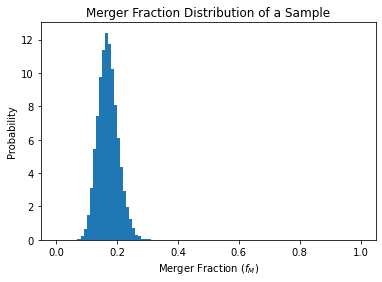

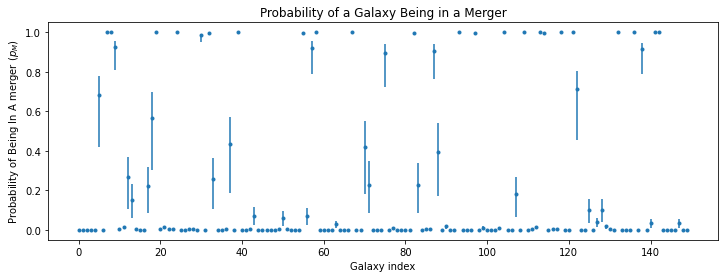

In [4]:
#5000 draws takes < 5 minutes on a 32GiB, 8 core machine, ubuntu18 OS and python 3.6
f_Ms_obs, r_Is_obs, r_Ms_obs, classif_obs, p_Ms_obs = m_tools.analyze_sample(obs, obs_train, true_samp, with_plots='y',draws=5000)
